In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd
import numpy as np


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [2]:
df=pd.read_csv("../현대차 공매도.csv",index_col='일자')

df.head()

,공매도 수량(전체),공매도 수량(잔고수량),공매도 금액(전체),공매도 금액(잔고금액)
일자,,,,
2021-03-31,895,935711,196578000,2.039850e+11
2021-03-30,44,871336,9661000,1.912580e+11
2021-03-29,1042,877706,222200000,1.891460e+11
2021-03-26,106,863065,22693000,1.859910e+11
2021-03-25,88,858710,19140000,1.871990e+11


In [3]:
df1=df.iloc[:,2:4]

In [4]:
df1.to_csv("현대차 공매도_금액.csv",mode="w")

In [5]:
df2=df.iloc[:,0:2]

In [6]:
df2.to_csv("현대차 공매도_수량.csv",mode="w")

In [7]:
df3=pd.read_csv("현대차 공매도_금액.csv",index_col='일자')


In [8]:
df3.head()

,공매도 금액(전체),공매도 금액(잔고금액)
일자,,
2021-03-31,196578000,2.039850e+11
2021-03-30,9661000,1.912580e+11
2021-03-29,222200000,1.891460e+11
2021-03-26,22693000,1.859910e+11
2021-03-25,19140000,1.871990e+11


Text(0.5, 1.0, '현대차 공매도 금액과 잔고금액')

Text(0, 0.5, '전체 거래대금(\\)')

Text(0.5, 0, 'Date')

Text(0, 0.5, '잔고금액(\\)')

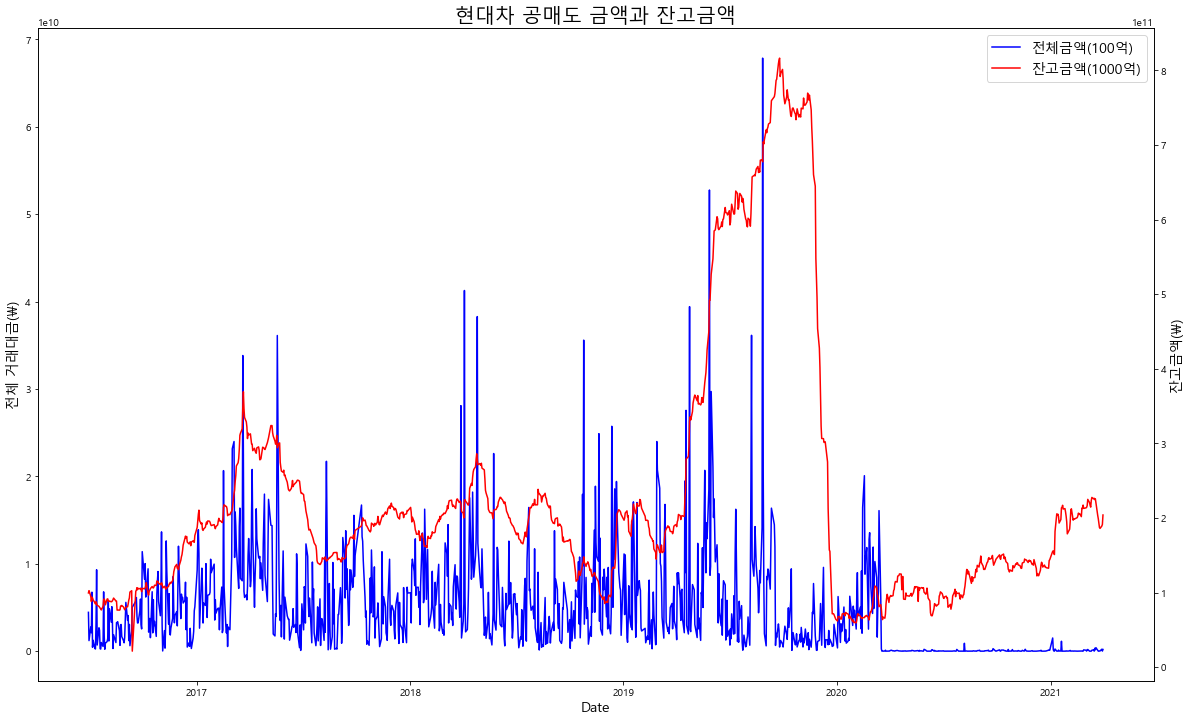

In [9]:
df3.index = pd.to_datetime(df3.index)

fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성
ax2 = ax.twinx()


line1=ax.plot(df3['공매도 금액(전체)'], label='전체금액(100억)', color='b')
line2=ax2.plot(df3['공매도 금액(잔고금액)'],label='잔고금액(1000억)', color='r')


ax.set_title('현대차 공매도 금액과 잔고금액', fontsize=20) # 타이틀 설정
ax.set_ylabel('전체 거래대금(\)', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y1축 설정
ax2.set_ylabel('잔고금액(\)', fontsize=14)   #y2축 설정



lines= line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='best',fontsize=14)

plt.show()

In [10]:
fig.savefig('현대차 공매도 금액(시각화).png')

In [11]:
df4=pd.read_csv("현대차 공매도_수량.csv",index_col='일자')

In [12]:
  df4.head()

,공매도 수량(전체),공매도 수량(잔고수량)
일자,,
2021-03-31,895,935711
2021-03-30,44,871336
2021-03-29,1042,877706
2021-03-26,106,863065
2021-03-25,88,858710


Text(0.5, 1.0, '현대차 수량과 잔고수량')

Text(0, 0.5, '공매도 수량(전체)')

Text(0.5, 0, 'Date')

Text(0, 0.5, '공매도 잔고수량')

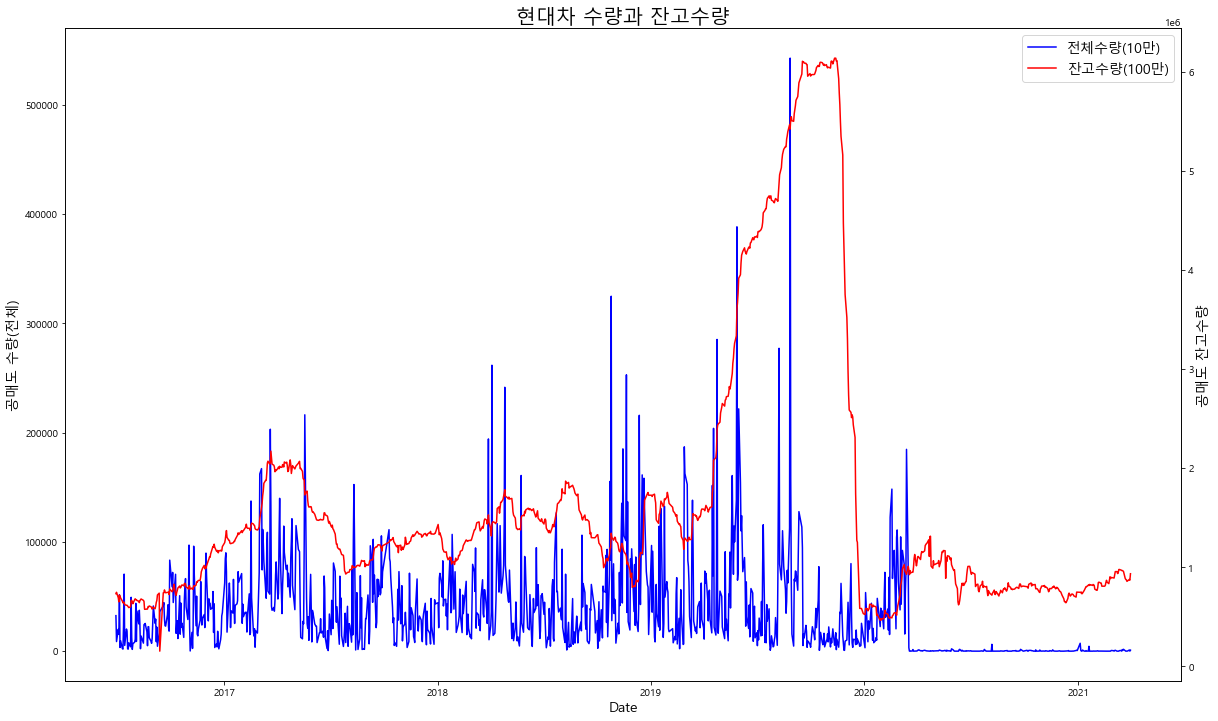

In [14]:
df4.index = pd.to_datetime(df4.index)

do = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
do1 = do.add_subplot(1,1,1) # subplot 생성
do2 = do1.twinx()


line3=do1.plot(df4['공매도 수량(전체)'], label='전체수량(10만)', color='b')
line4=do2.plot(df4['공매도 수량(잔고수량)'],label='잔고수량(100만)', color='r')


do1.set_title('현대차 수량과 잔고수량', fontsize=20) # 타이틀 설정
do1.set_ylabel('공매도 수량(전체)', fontsize=14) # x축 설정
do1.set_xlabel('Date', fontsize=14) # y1축 설정
do2.set_ylabel('공매도 잔고수량', fontsize=14)   #y2축 설정



lines= line3 + line4
labels = [l.get_label() for l in lines]
do1.legend(lines, labels, loc='best',fontsize=14)

plt.show()

In [15]:
do.savefig('현대차 공매도 수량(시각화).png')